In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Read file

In [2]:
data_df = pd.read_csv("datasets/ml-100k/u.data",delimiter="\t",header=None)
data_df.columns = ['user_id', 'movie_id', 'rating' ,'timestamp'] 


item_df = pd.read_csv("datasets/ml-100k/u.item",delimiter="|",header=None)
genre_names = pd.read_csv("datasets/ml-100k/u.genre",delimiter="|",header=None)[0]
item_df.columns =['movie_id','movie_title','release_data','video_release_date','IMDb_URL',*genre_names.tolist()]

user_df = pd.read_csv("datasets/ml-100k/u.user",delimiter="|",header=None)
occupation_name = pd.read_csv("datasets/ml-100k/u.occupation",delimiter="|",header=None)[0]
user_df.columns = ['user_id','age','gender','occupation','zip_code']
print("Data")
display(data_df.head())
print("User")
display(user_df.head())
print("Item")
display(item_df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/ml-100k/u.data'

Task 1 : Numbers of users , Numbers of items , Sparcity of the dataset

In [ ]:
print("Number of users x features: ", user_df.shape)
print("Number of items x features: ", item_df.shape)

rate_qtd = data_df.shape[0]
total_rate = user_df.shape[0]*item_df.shape[0]
sparcity = ((total_rate - rate_qtd) / total_rate)*100
print("Sparcity of dataset: %.2f" %sparcity,"%")

Number of users x features:  (943, 5)
Number of items x features:  (1682, 24)
Sparcity of dataset: 93.70 %


Task 2 :
User demographic information

Distribution of users by age

In [ ]:
pd.DataFrame(user_df['age'].describe()).T

,count,mean,std,min,25%,50%,75%,max
age,943.0,34.051962,12.19274,7.0,25.0,31.0,43.0,73.0


Distribution of users by gender

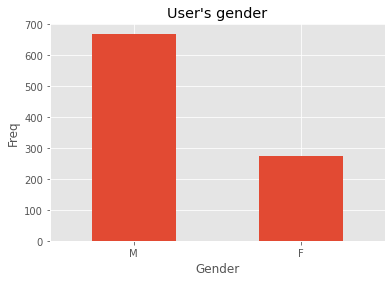

In [ ]:
plt.style.use('ggplot')
user_df['gender'].value_counts().plot(kind='bar',ylabel='Freq',xlabel='Gender',title="User's gender",rot=0)
plt.show()

Distribution of users by occupation

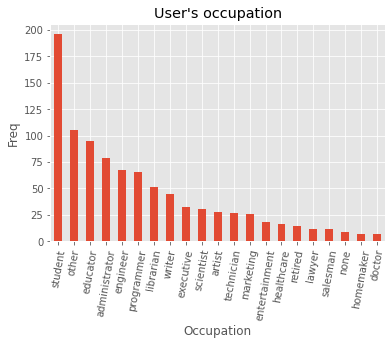

In [ ]:
plt.style.use('ggplot')
user_df['occupation'].value_counts(ascending=0).plot(kind='bar',ylabel='Freq',xlabel='Occupation',title="User's occupation",rot=80)
plt.show()

Task 3 : Distributions with items characteristics

Distribution of items by categories

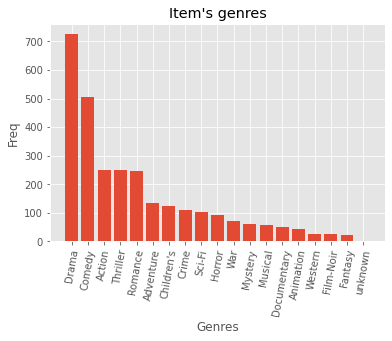

In [ ]:
#Dict to count the frequency of each genre
item_genre = dict()
for genre in genre_names:
    item_genre[genre] = item_df[genre].value_counts()[1]
item_genre = dict(sorted(item_genre.items(), key=lambda x:x[1],reverse=1))

plt.bar(item_genre.keys(),item_genre.values())
plt.xticks(rotation=80)
plt.title("Item's genres");plt.xlabel("Genres"); plt.ylabel("Freq")
plt.show()


Task 4 : Distributions about the user-item interaction

The rating frequency

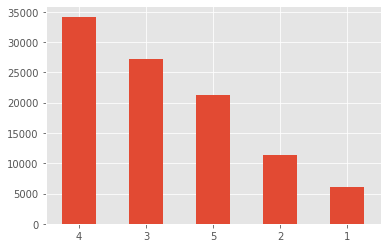

In [ ]:
data_df['rating'].value_counts(ascending=0).plot(kind='bar',xlabel=None,rot=0)
plt.show()

The items' popularity

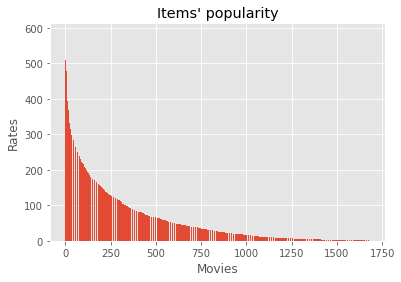

,count,mean,std,min,25%,50%,75%,max
Rates,1682.0,59.453032,80.383846,1.0,6.0,27.0,80.0,583.0


In [ ]:
plt.style.use("ggplot")
item_rate = pd.DataFrame(data_df.groupby(by="movie_id").size()).sort_values(by=0,ascending=0)

item_rate.columns = ["Rates"]
plt.bar(range(0,item_rate.shape[0]),item_rate["Rates"])
plt.title("Items' popularity") ; plt.xlabel("Movies") ; plt.ylabel("Rates")
plt.show()
pd.DataFrame(item_rate["Rates"].describe()).T

The user history of interactions

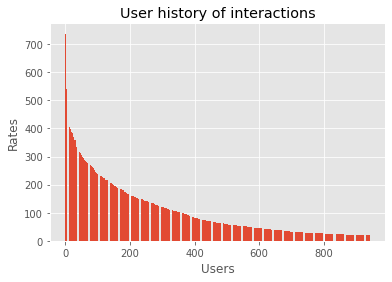

,count,mean,std,min,25%,50%,75%,max
Rates,943.0,106.044539,100.931743,20.0,33.0,65.0,148.0,737.0


In [ ]:
plt.style.use("ggplot")
user_rate = pd.DataFrame(data_df.groupby(by="user_id").size()).sort_values(by=0,ascending=0)
user_rate.columns = ["Rates"]

plt.bar(range(0,user_rate.shape[0]),user_rate["Rates"])
plt.title("User history of interactions") ; plt.xlabel("Users") ; plt.ylabel("Rates")
plt.show()
pd.DataFrame(user_rate["Rates"].describe()).T

Transform timestamp of unix second into columns of day, month and year

In [3]:
def convert_timeDay(row):
    return datetime.fromtimestamp(row['timestamp']).strftime("%d")
def convert_timeMonth(row):
    return datetime.fromtimestamp(row['timestamp']).strftime("%m")
def convert_timeYear(row):
    return datetime.fromtimestamp(row['timestamp']).strftime("%Y")

time_df = pd.DataFrame(data_df[["user_id","timestamp"]])
time_df = time_df.sort_values(by='timestamp',ascending = 1)
time_df["day"] = time_df.apply(lambda row: convert_timeDay(row), axis=1)
time_df["month"] = time_df.apply(lambda row: convert_timeMonth(row), axis=1)
time_df["year"] = time_df.apply(lambda row: convert_timeYear(row), axis=1)


NameError: name 'data_df' is not defined

Numbers of items rated by users per day

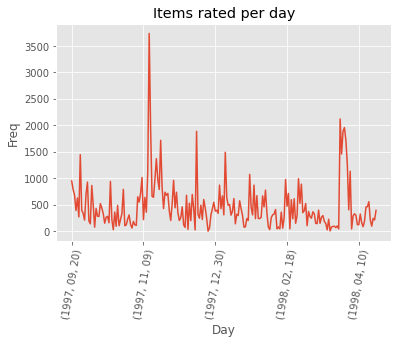

,count,mean,std,min,25%,50%,75%,max
0,213.0,469.483568,460.03207,2.0,200.0,338.0,617.0,3735.0


In [ ]:
rate_day = time_df.groupby(by=["year","month","day"]).size()
rate_day.plot(kind='line',title="Items rated per day",ylabel="Freq",xlabel="Day",rot=80)
plt.show()
pd.DataFrame(rate_day.describe()).T

Numbers of items rated by users per month

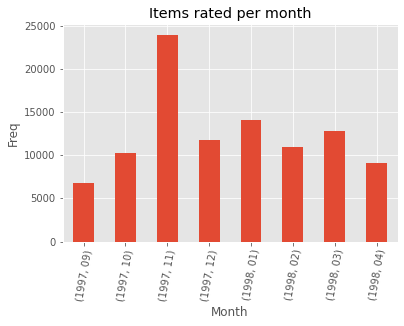

,count,mean,std,min,25%,50%,75%,max
0,8.0,12500.0,5153.572242,6808.0,10021.25,11410.0,13157.5,23997.0


In [ ]:
rate_month = time_df.groupby(by=["year","month"]).size()
rate_month.plot(kind='bar',title="Items rated per month",ylabel="Freq",xlabel="Month",rot=80)
plt.show()
pd.DataFrame(rate_month.describe()).T

Numbers of items rated by users per year

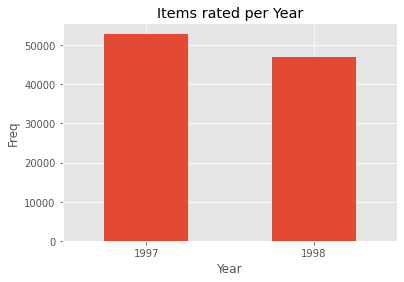

year,1997,1998
0,52930,47070


In [ ]:
rate_year = time_df.groupby(by="year").size()
rate_year.plot(kind='bar',title="Items rated per Year",ylabel="Freq",xlabel="Year",rot=0)
plt.show()
pd.DataFrame(rate_year).T

Cumulative distribution of users who joined the system

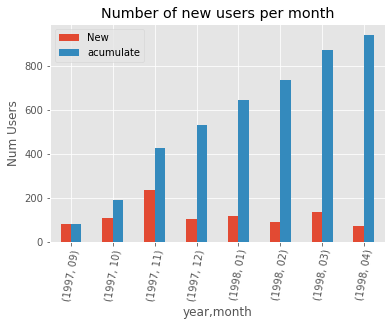

In [ ]:
user_timeFirst = time_df.sort_values(by="timestamp",ascending=1).drop_duplicates(subset=['user_id'], keep='first')
user_acumulative = pd.DataFrame(user_timeFirst.groupby(["year","month"]).size())
user_acumulative.columns = ["New"]

sum = 0 ; sum_list = []
for value in user_acumulative["New"]:
    sum = sum + value
    sum_list.append(sum)
user_acumulative["acumulate"] = sum_list
user_acumulative.plot(kind="bar",ylabel="Num Users",title="Number of new users per month",rot=80)
plt.show()

Task 5 : Cross the demographic information with the user-item interactions

Title of most popular items in system

In [ ]:
item_df = item_df.merge(item_rate.reset_index()).sort_values(by="Rates",ascending=0)
item_df["movie_title"].head(10)

49                  Star Wars (1977)
257                   Contact (1997)
99                      Fargo (1996)
180        Return of the Jedi (1983)
293                 Liar Liar (1997)
285      English Patient, The (1996)
287                    Scream (1996)
0                   Toy Story (1995)
299             Air Force One (1997)
120    Independence Day (ID4) (1996)
Name: movie_title, dtype: object

Categories most rated by the users

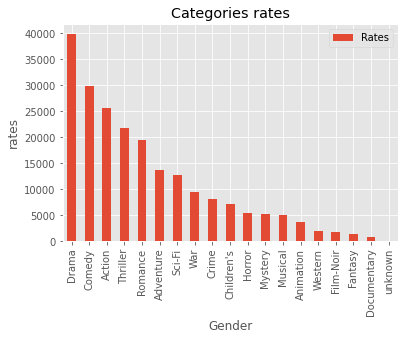

In [ ]:
def cat_rates(row):
    for genre in genre_names:
        row[genre] = row[genre]*row["Rates"]
    return row
copy_df = item_df.apply(lambda row: cat_rates(row), axis=1)

categories_rate = {}
for genre in genre_names:
    categories_rate[genre] = copy_df[genre].sum()

categories_rate=pd.DataFrame(categories_rate.items())
categories_rate.columns = ["Gender","Rates"]
categories_rate=categories_rate.set_index("Gender").sort_values(by="Rates",ascending=0)
categories_rate.plot(kind='bar',ylabel='rates',title='Categories rates')
plt.show()

Analising data with group of ages

Merging the datasets

In [ ]:
data_df.columns = ["user_id","movie_id","rating","timestamp"]
merge_df = item_df.merge(pd.merge(data_df,user_df))
merge_df = merge_df.drop(['rating','timestamp','zip_code','video_release_date','IMDb_URL','Rates'],axis=1)

Functions to get most popular movies and categories by an interval of age

In [ ]:
def movies_byAge(ageInf,ageSup):
    mergeAge_df = merge_df.loc[(merge_df['age'] > ageInf) & (merge_df['age'] <= ageSup)]
    movies = pd.DataFrame(mergeAge_df.groupby("movie_title").size().sort_values(ascending=0).reset_index())
    movies.columns = ["movies","freq"]
    return movies
def genres_byAge(ageInf,ageSup):
    mergeAge_df = merge_df.loc[(merge_df['age'] > ageInf) & (merge_df['age'] <= ageSup)]
    genres = pd.DataFrame(mergeAge_df[genre_names.to_list()].sum().sort_values(ascending=0).reset_index())
    genres.columns = ["genres","freq"]
    return genres

Title of movies and categories most popular of users up to 31 years old

Popular movies of users up to 31 years
 0                 Star Wars (1977)
1                    Scream (1996)
2        Return of the Jedi (1983)
3                   Contact (1997)
4                 Liar Liar (1997)
5                     Fargo (1996)
6                 Toy Story (1995)
7               Chasing Amy (1997)
8    Independence Day (ID4) (1996)
9            Twelve Monkeys (1995)
Name: movies, dtype: object


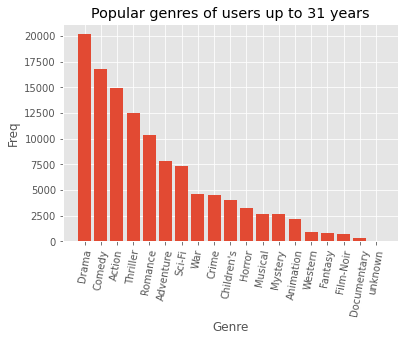

In [ ]:
movies = movies_byAge(1,31)
genres = genres_byAge(1,31)
print("Popular movies of users up to 31 years\n",movies['movies'].head(10))
plt.bar(genres["genres"],genres["freq"])
plt.xticks(rotation=80)
plt.xlabel("Genre");plt.ylabel("Freq");plt.title("Popular genres of users up to 31 years")
plt.show()

Title of movies and categories most popular of users over 31 years old

Popular movies of users over 31 years old
 0                 Star Wars (1977)
1                   Contact (1997)
2                     Fargo (1996)
3        Return of the Jedi (1983)
4                 Liar Liar (1997)
5      English Patient, The (1996)
6                    Scream (1996)
7                 Toy Story (1995)
8             Air Force One (1997)
9    Independence Day (ID4) (1996)
Name: movies, dtype: object


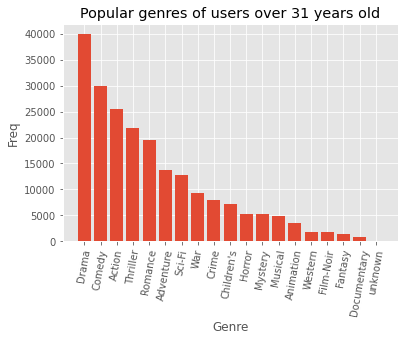

In [ ]:
movies = movies_byAge(1,user_df['age'].max())
genres = genres_byAge(1,user_df['age'].max())
print("Popular movies of users over 31 years old\n",movies['movies'].head(10))
plt.bar(genres["genres"],genres["freq"])
plt.xticks(rotation=80)
plt.xlabel("Genre");plt.ylabel("Freq");plt.title("Popular genres of users over 31 years old")
plt.show()

Function to get most popular categories of users by occupation

In [ ]:
def genres_byOccupation(occupation):
    mergeOcu_df = merge_df.loc[merge_df['occupation'] == occupation]
    genres = pd.DataFrame(mergeOcu_df[genre_names.to_list()].sum().sort_values(ascending=0).reset_index())
    genres.columns = ["genres","freq_"+occupation]
    return genres

Most popular categories of users by occupation

In [ ]:
for occupation in occupation_name:
    ocu_df = genres_byOccupation(occupation)
    print(occupation)
    display(pd.DataFrame(ocu_df['genres'].head(5)).T)

administrator


,0,1,2,3,4
genres,Drama,Comedy,Action,Thriller,Romance


artist


,0,1,2,3,4
genres,Drama,Comedy,Action,Thriller,Romance


doctor


,0,1,2,3,4
genres,Drama,Comedy,Romance,Thriller,Action


educator


,0,1,2,3,4
genres,Drama,Comedy,Romance,Action,Thriller


engineer


,0,1,2,3,4
genres,Drama,Comedy,Action,Thriller,Romance


entertainment


,0,1,2,3,4
genres,Drama,Comedy,Thriller,Action,Romance


executive


,0,1,2,3,4
genres,Drama,Comedy,Thriller,Action,Romance


healthcare


,0,1,2,3,4
genres,Drama,Comedy,Action,Thriller,Romance


homemaker


,0,1,2,3,4
genres,Drama,Thriller,Comedy,Action,Romance


lawyer


,0,1,2,3,4
genres,Drama,Comedy,Action,Romance,Thriller


librarian


,0,1,2,3,4
genres,Drama,Comedy,Romance,Action,Thriller


marketing


,0,1,2,3,4
genres,Drama,Comedy,Action,Thriller,Romance


none


,0,1,2,3,4
genres,Action,Drama,Thriller,Comedy,Adventure


other


,0,1,2,3,4
genres,Drama,Comedy,Action,Thriller,Romance


programmer


,0,1,2,3,4
genres,Drama,Comedy,Action,Thriller,Romance


retired


,0,1,2,3,4
genres,Drama,Comedy,Romance,Thriller,Action


salesman


,0,1,2,3,4
genres,Drama,Comedy,Action,Thriller,Romance


scientist


,0,1,2,3,4
genres,Drama,Action,Comedy,Thriller,Romance


student


,0,1,2,3,4
genres,Drama,Comedy,Action,Thriller,Romance


technician


,0,1,2,3,4
genres,Drama,Action,Comedy,Thriller,Romance


writer


,0,1,2,3,4
genres,Drama,Comedy,Thriller,Action,Romance
